In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
spotify_df = pd.read_csv("../data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")
spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


In [3]:
# Group by 'Genre' and calculate teh average total streams
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean()
avg_streams

Genre
Classical    2739.955417
EDM          2466.699804
Hip Hop      2284.867551
Indie        2661.669400
Jazz         2408.460000
K-pop        2760.691667
Pop          2686.797500
R&B          2779.311707
Reggaeton    2404.313636
Rock         2558.947069
Name: Total Streams (Millions), dtype: float64

# BAR CHARTS

Great for measure some value on categorical data.<br>
`x axis` represents a category and `y axis` a count.

<BarContainer object of 10 artists>

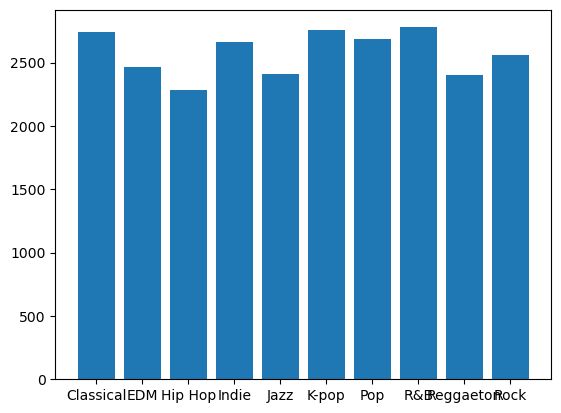

In [4]:

plt.bar(avg_streams.index, avg_streams.values)

Use `sort_values` to sort values. Pass `ascending=False` as a parameter to show descending order.

<function matplotlib.pyplot.show(close=None, block=None)>

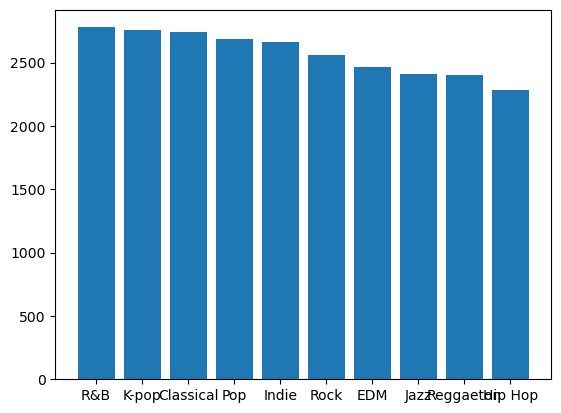

In [5]:
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

plt.bar(avg_streams.index, avg_streams.values)
plt.show

Pass the `.xlabel` method to add a label to the `x axis` and `.ylabel` to label the `y axis`.<br>
Add a title to the graph by passing `.title`

<function matplotlib.pyplot.show(close=None, block=None)>

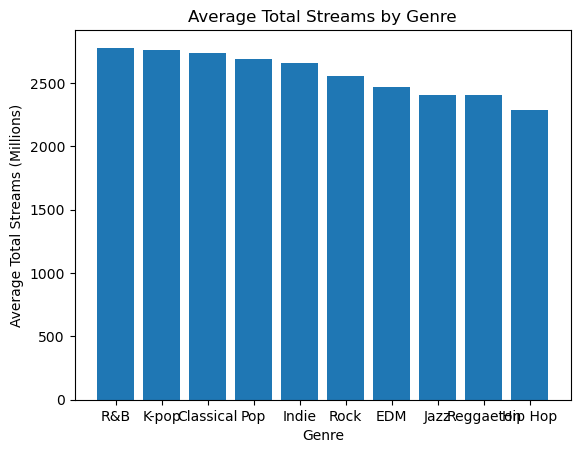

In [6]:
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

plt.bar(avg_streams.index, avg_streams.values)
plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.show

# Formatting

- Use`.figure` to change size of plot. Adjust the `figsize` parameter to the desired size.<br>
Usually, `figsize=(10, 6)` renders well in most computers.<br>
<br>
- Use `.xticks` to change the angle of lables across the `x axis`. This method takes several arguments:<br>
        1 - `rotation` that can be set to `45` to rotate label 45 degrees<br>
        2 - `ha` that stands for "Horizontal Alignment" and that will take, for now, `right` as a value<br>
<br>
- Use `tight_layout` to normalize spacing between bars in the chart.<br>
<br>
- Remove "spines", which are the borders around the charts by:<br>
        1 - creating a variable, usually one named `ax`;<br>
        2 - pass `.gca` to the plot. GCA stands for "Get Current Axis";<br>
        3 - call `.spines` from the variable `ax`<br>
        4 - Use bracket notation to select what spine will be targetted;<br>
        5 - Set property `set_visible` to `False`<br>


<function matplotlib.pyplot.show(close=None, block=None)>

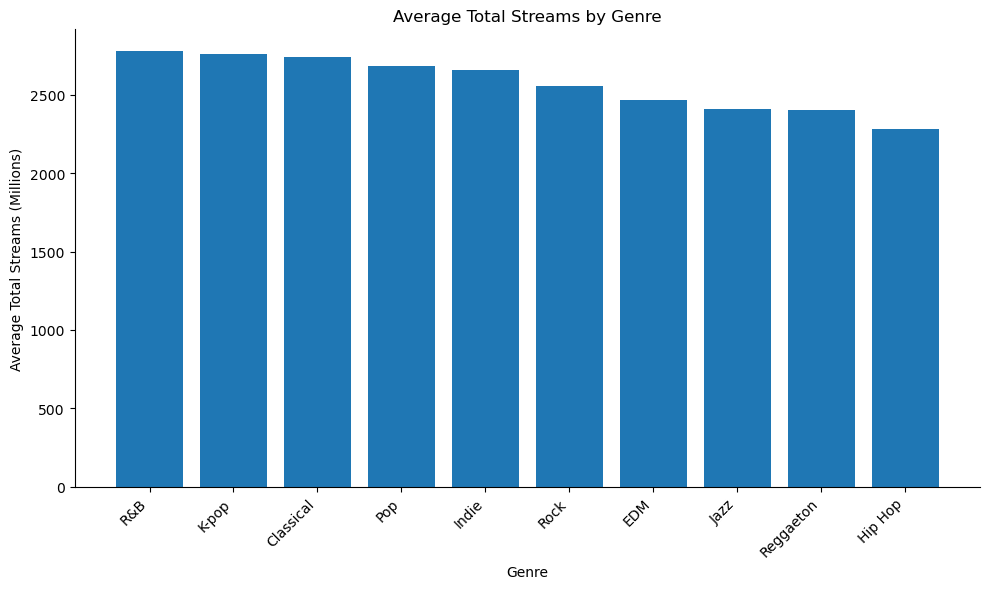

In [7]:
avg_streams = spotify_df.groupby("Genre")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_streams

plt.figure(figsize=(10, 6))
plt.bar(avg_streams.index, avg_streams.values)


# Removing spines of the plot
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Genre")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Genre")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show

Practicing with a different `group by`<br>

- Change the color of bars in teh plot by passing the `color` argument to `.bar`;<br>
- Highlight one artist with a different color by using the `.idxmax()` and `.get_loc()` functions

<function matplotlib.pyplot.show(close=None, block=None)>

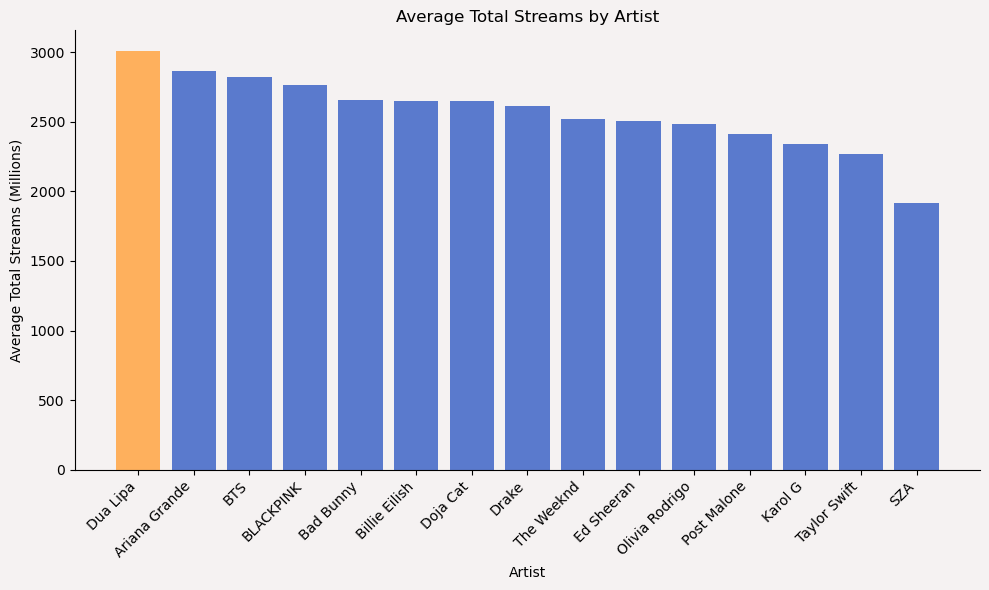

In [8]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams

plt.figure(figsize=(10, 6), facecolor="#F5F2F2") # Change backrgound color of plot
colors = ["#5A7ACD"]*len(avg_artist_streams)

max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#FEB05D"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width=0.8)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#F5F2F2") # Change background color behind axes

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show


More Practice:<br>
- What if we want to highlight any other artist based on a predetermined condition. 

<function matplotlib.pyplot.show(close=None, block=None)>

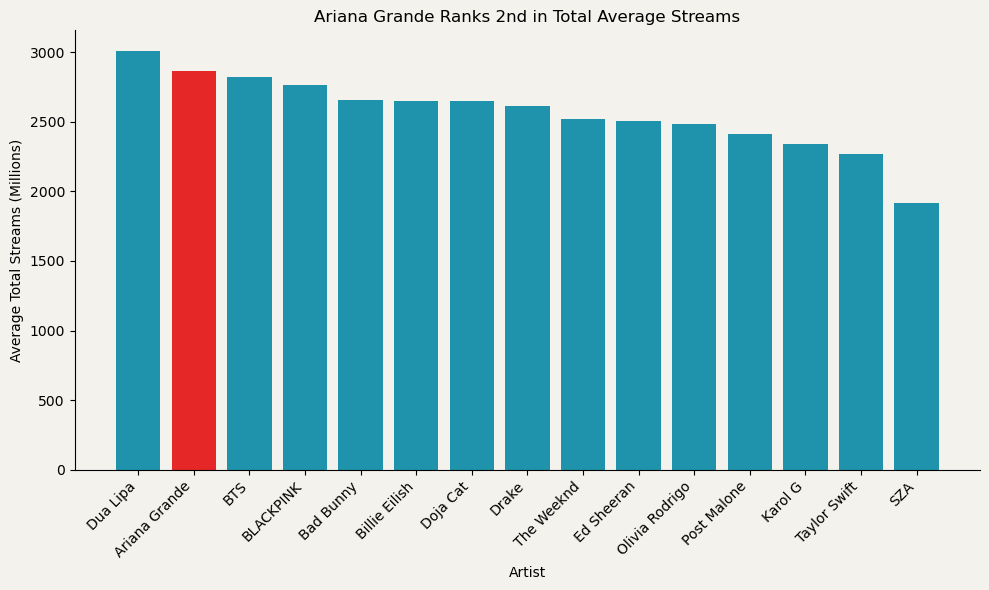

In [78]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending = False)
avg_artist_streams

plt.figure(figsize=(10, 6), facecolor="#F3F2EC") # Change backrgound color of plot

special_artist = "Ariana Grande"
colors = ["#E62727" if artist == special_artist else "#1E93AB" for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.8)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#F3F2EC") # Change background color behind axes

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Ariana Grande Ranks 2nd in Total Average Streams")
plt.xticks(rotation = 45, ha = "right")

plt.tight_layout()

plt.savefig("../plots/ArianaGrandeTotalAverageStreams.png")
plt.show

# Scatter Plots

Ideal for two numerical values (numbers vs. numbers)<br>
You may verify the data type of a certain column by using the `.info()` method.


In [10]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

<function matplotlib.pyplot.show(close=None, block=None)>

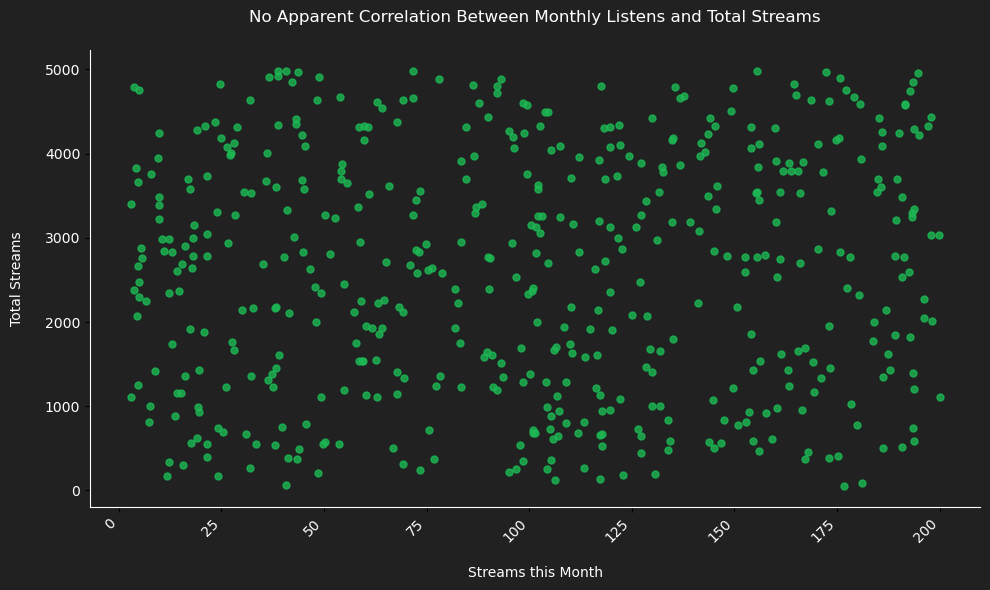

In [ ]:
plt.figure(figsize=(10, 6), facecolor = "#212121")

plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], 
            spotify_df["Total Streams (Millions)"],
            color = "#1DB954",
            alpha = 0.8,
            s = 25)

plt.xlabel("Streams this Month", color = "#FFFFFF", labelpad = 15) # fixing padding around the axis labels
plt.ylabel("Total Streams", color = "#FFFFFF", labelpad = 15)
plt.title("No Apparent Correlation Between Monthly Listens and Total Streams", color = "#FFFFFF", pad = 20)
plt.xticks(rotation=45, ha="right", color = "#FFFFFF")
plt.yticks(color = "#FFFFFF")


ax = plt.gca()
ax.spines["left"].set_color("#FFFFFF")
ax.spines["bottom"].set_color("#FFFFFF")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#212121")


plt.tight_layout()


plt.show

More Practice<br>

- What if we want to highlight only certain dots? For example, just hightlight certain Genres based on certain conditions?

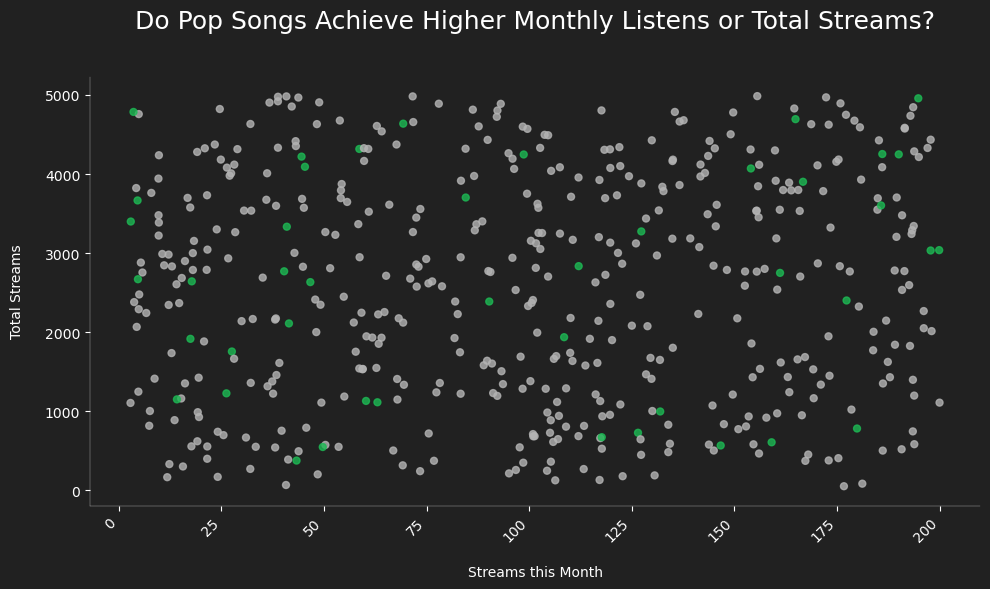

In [79]:
plt.figure(figsize=(10, 6), facecolor = "#212121")

featured_genre = "Pop"

colors = ["#1DB954" if genre == featured_genre else "#b3b3b3" for genre in spotify_df["Genre"]]

plt.scatter(spotify_df["Streams Last 30 Days (Millions)"], 
            spotify_df["Total Streams (Millions)"],
            color = colors,
            alpha = 0.8,
            s = 25)

plt.xlabel("Streams this Month", color = "#FFFFFF", labelpad = 15) # fixing padding around the axis labels
plt.ylabel("Total Streams", color = "#FFFFFF", labelpad = 15)
plt.title("No Apparent Correlation Between Monthly Listens and Total Streams", color = "#FFFFFF", pad = 20)
plt.xticks(rotation=45, ha="right", color = "#FFFFFF")
plt.yticks(color = "#FFFFFF")

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(color = "#FFFFFF") # Tiny markers on the axis
ax.set_facecolor("#212121")
ax.set_title("Do Pop Songs Achieve Higher Monthly Listens or Total Streams?", fontsize = 18, color = "#FFFFFF", pad = 35)

for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.8)
    spine.set_color("#FFFFFF")

plt.tight_layout()

plt.savefig("../plots/ScatterPlotExample.png")
plt.show()

# LINE CHARTS

Great to show change over time.

In [13]:
yearly_avg = spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)
yearly_avg

Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

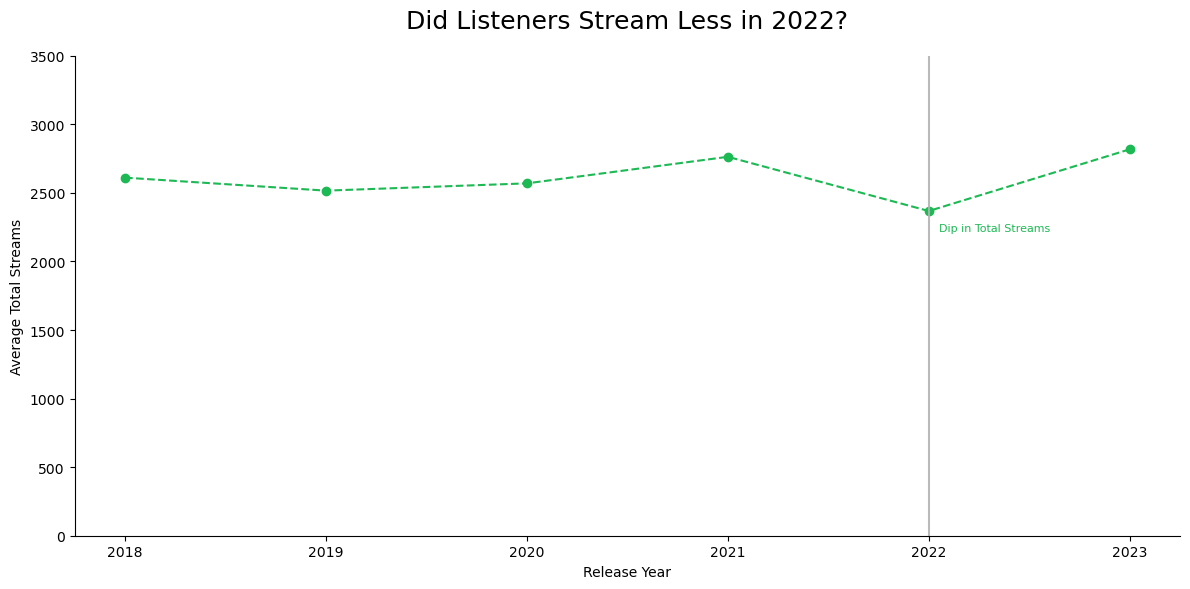

In [80]:
plt.figure(figsize = (12, 6))
plt.plot(
    yearly_avg.index, 
    yearly_avg.values,
    marker = "o",
    linestyle = "--",
    color = "#1DB954",
    linewidth = 1.5
    )

plt.xlabel("Release Year")
plt.ylabel("Average Total Streams")
plt.title("Did Listeners Stream Less in 2022?", fontsize = 18, pad = 20)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.axvline(
    2022,
    color = "#b3b3b3",
    linewidth = 1.5,
    alpha = 0.9
)

ax.text(
    2022+0.05,
    2225,
    "Dip in Total Streams",
    color = "#1DB954",
    fontsize = 8
)

plt.ylim(0, 3500)

plt.tight_layout()

plt.savefig("../plots/LineChartExamples.png")
plt.show()

# Pie Charts

Used for categorical data to show how parts contribute to a whole.

In [ ]:
category = "Platform Type"
values = "Total Streams (Millions)"

platform_totals = spotify_df.groupby(category)[values].sum()
platform_totals

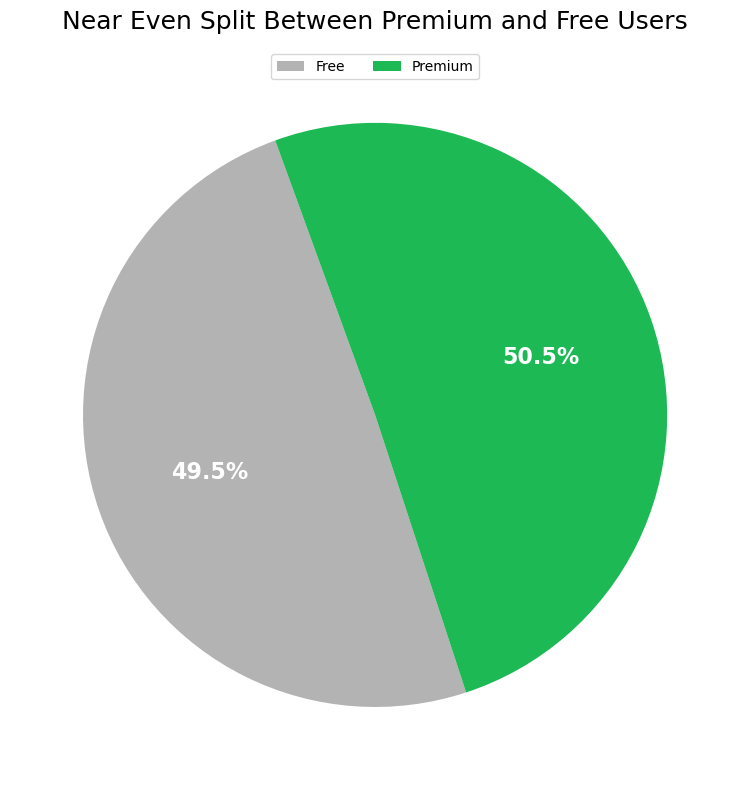

In [43]:
fig, ax = plt.subplots(figsize = (8, 8))

wedges, text, autotexts = ax.pie(
    platform_totals,
    autopct = "%1.1f%%",
    startangle = 110,
    colors = ["#b3b3b3", "#1db954"]
    )

ax.set_title(
    "Near Even Split Between Premium and Free Users",
    fontsize = 18,
    pad = 15,
    loc = "center"
    )

for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_color("white")
    autotext.set_weight("bold")

ax.legend(
    wedges,
    platform_totals.index,
    loc = "lower center",
    bbox_to_anchor = (0.5, 0.95),
    ncol = 2
)

plt.tight_layout()
plt.show()

# Histograms
Histograms are great for understanding the shape and spread of your data.<br>
They can help you spot things like skewed distributions, common value ranges, or outliers.<br>
For example, you might use a histogram to explore how most songs cluster around a certain stream duration, or how skip rates vary across the catalog.

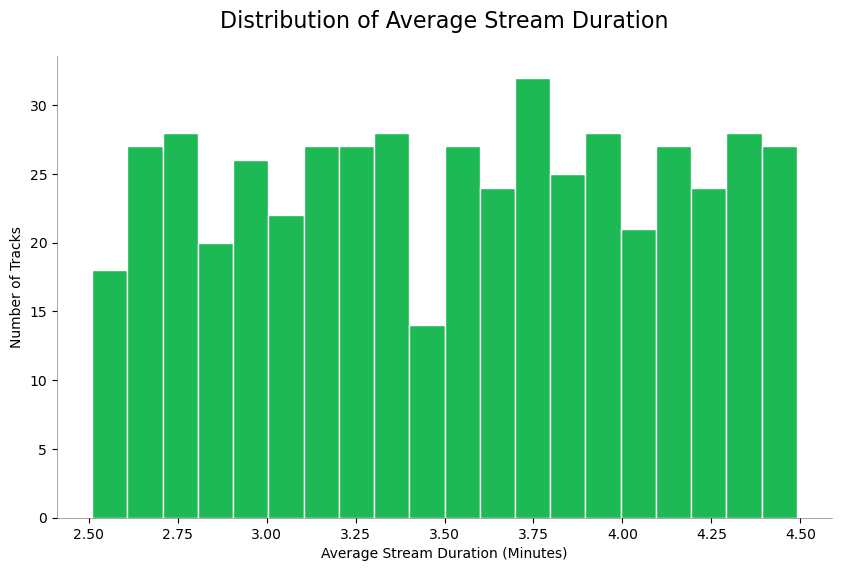

In [56]:
plt.figure(figsize = (10, 6))

plt.hist(
    spotify_df["Avg Stream Duration (Min)"],
               bins = 20,
               color = "#1db954",
               edgecolor = "#FFFFFF"
               )

plt.xlabel("Average Stream Duration (Minutes)")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Average Stream Duration",
          fontsize = 16,
          pad = 20
          )

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

# Boxplots

Boxplots are a compact way to compare the spread of a numeric variable across different categories.<br>
<br>
- Choose a numeric column (like skip rate or stream duration) and a categorical column (like platform type or genre)<br>
- It takes a list of numeric datasets<br>
- Use `plt.boxplot()` to compare distributions<br>
- Interpret medians, quartiles, and outliers<br>
- Rotate tick labels and customize colors<br>
- Boxplots are great for spotting variability, skew, and outliers.<br>
<br>
Boxplots are especially useful when you want to compare how a metric differs across groups, like seeing whether Premium streams tend to have lower skip rates than Free streams.


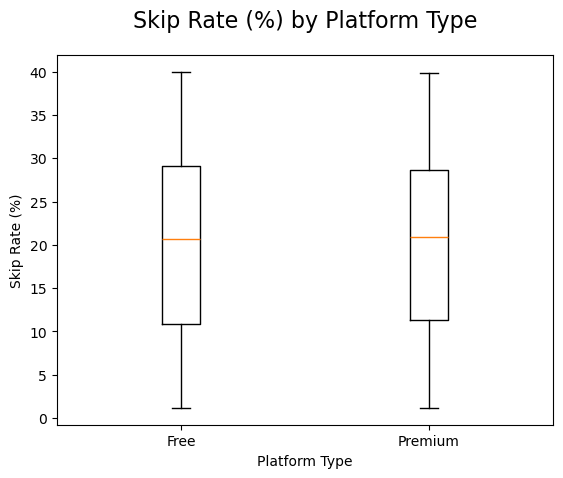

In [59]:
plt.boxplot(
    [spotify_df[spotify_df["Platform Type"] == "Free"]["Skip Rate (%)"],
     spotify_df[spotify_df["Platform Type"] == "Premium"]["Skip Rate (%)"]
    ]
)

plt.xticks([1, 2],["Free", "Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rate (%) by Platform Type",
          fontsize = 16,
          pad = 20
          )

plt.show()

# Heatmaps

Heatmaps use color to represent values in a matrix, often for comparing relationships or intensities across two dimensions.<br>
<br>
- Create a correlation matrix using `.corr()` on numeric columns<br>
- Use `plt.imshow()` or `plt.matshow()` to visualize it<br>
- Add a colorbar, axis ticks, and labels<br>
- Format the layout for readability<br>
<br>
Heatmaps are commonly used to explore correlations between variables.<br>
For example, you can quickly spot whether energy, valence, or tempo tend to rise and fall together, or whether skip rate is negatively correlated with popularity.

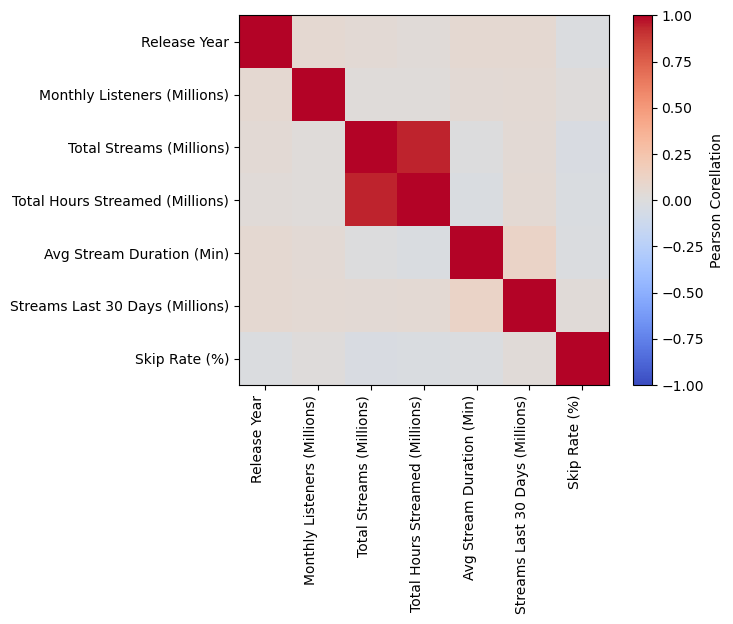

In [ ]:
numeric_spotify_df = spotify_df.select_dtypes(include = [np.number])
numeric_spotify_df.head()

corr = numeric_spotify_df.corr()

im = plt.imshow(corr,
                vmin = -1,
                cmap = "coolwarm"
                )

plt.colorbar(im,
             label = "Pearson Corellation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation = 90, ha = "right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Streaming Metrics Correlation Heatmap",
          fontsize = 16,
          pad = 20
          )

plt.show()

# Count Plots

Count plots show how many records fall into each category.<br>
<br>
- Use `.value_counts()` to count rows per category (e.g. platform type or genre)<br>
- Use `plt.bar()` to visualize those counts<br>
- Add labels and adjust layout<br>
- Sort values for better visual clarity<br>
<br>
Count plots are perfect for exploring how common different categories are.<br>
They're a quick way to answer questions like:<br>
*Which genres appear most often in the dataset?* or *Are more songs streamed on Premium vs Free platforms?*

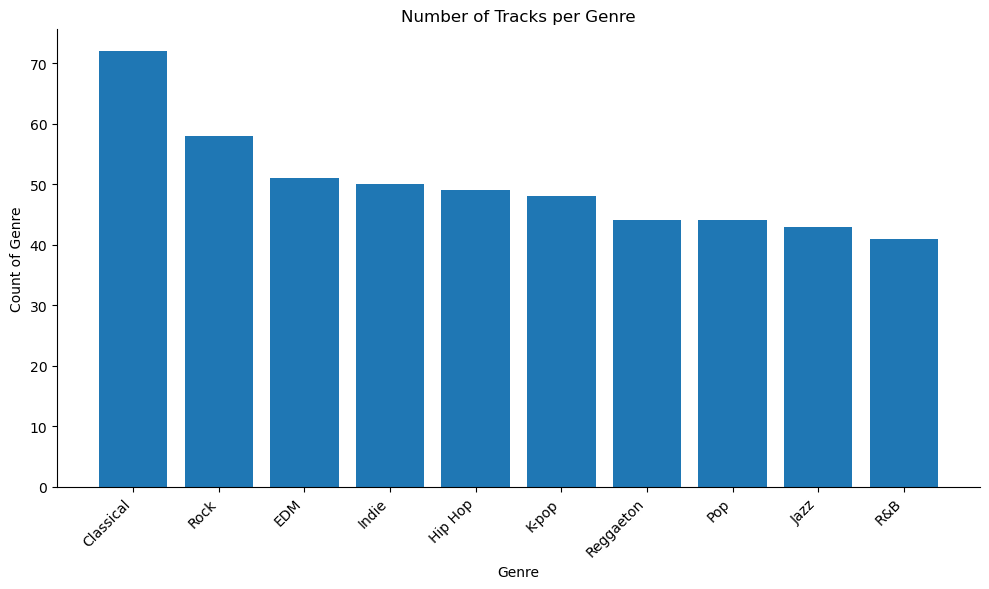

In [75]:
genre_counts = spotify_df["Genre"].value_counts().sort_values(ascending = False)
genre_counts

plt.figure(figsize=(10, 6))

plt.bar(genre_counts.index,
        genre_counts.values
        )
plt.xlabel("Genre")
plt.ylabel("Count of Genre")
plt.title("Number of Tracks per Genre")
plt.xticks(rotation = 45,
           ha = "right"
           )

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


plt.tight_layout()
plt.show

plt.show()

# Saving Plots

Use `.savefig()` to save plots into a folder within project. <br>
Pass the location where the plot should be saved as an argument.

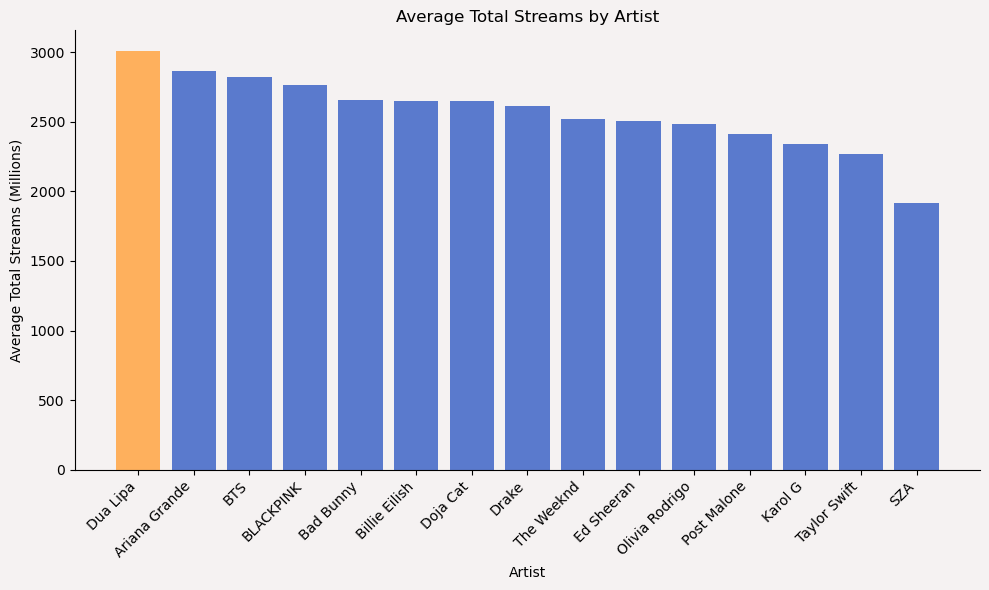

In [77]:
avg_artist_streams = spotify_df.groupby("Artist")["Total Streams (Millions)"].mean().sort_values(ascending=False)
avg_artist_streams

plt.figure(figsize=(10, 6), facecolor="#F5F2F2") # Change backrgound color of plot
colors = ["#5A7ACD"]*len(avg_artist_streams)

max_index = avg_artist_streams.idxmax()
highlight_position = avg_artist_streams.index.get_loc(max_index)
colors[highlight_position] = "#FEB05D"

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width=0.8)


ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#F5F2F2") # Change background color behind axes

plt.xlabel("Artist")
plt.ylabel("Average Total Streams (Millions)")
plt.title("Average Total Streams by Artist")
plt.xticks(rotation = 45, 
           ha = "right")

plt.tight_layout()

plt.savefig("../plots/AverageTotalStreamsbyArtist.png")
plt.show()